In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
df=sns.load_dataset("titanic")

In [2]:
dfgroupby=df.groupby("class")
dfgroupby

In [3]:
dfgroupby.ngroups

3

In [4]:
dfgroupby.size()

class
First     216
Second    184
Third     491
dtype: int64

In [5]:
df1=df[df["class"]=="First"]
print(df1.shape)
df2=df[df["class"]=="Second"]
print(df2.shape)

(216, 15)
(184, 15)


In [6]:
# Vertical concatenation
final_data=df1.append(df2,ignore_index=True)
final_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
2,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
3,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
4,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,2,female,27.0,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
396,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
397,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
398,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True


In [7]:
import pandas as pd

In [8]:
final_data=pd.concat([df1,df2])
print(final_data.shape)

(400, 15)


In [9]:
#Horizontal concatenation
df1=final_data[:200]
print(df1.shape)
df2=final_data[200:]
print(df2.shape)
final_data2=pd.concat([df1,df2],axis=1,ignore_index=True)
print(final_data2.shape)

(200, 15)
(200, 15)
(400, 30)


In [12]:
scores1=[{'Subject':'Mathematics','Score':85,'Grade':'B','Remarks':'Good'},
        {'Subject':'History','Score':98,'Grade':'A','Remarks':'Excellent'},
        {'Subject':'English','Score':76,'Grade':'C','Remarks':'Fair'},
        {'Subject':'Mathematics','Score':72,'Grade':'C','Remarks':'Fair'},
        {'Subject':'Arts','Score':95,'Grade':'A','Remarks':'Excellent'}]
scores2=[{'Subject':'Science','Score':76,'Grade':'B','Remarks':'Fair'},
        {'Subject':'English','Score':95,'Grade':'A','Remarks':'Good'},
        {'Subject':'English','Score':85,'Grade':'C','Remarks':'Excellent'},
        {'Subject':'Mathematics','Score':98,'Grade':'C','Remarks':'Good'},
        {'Subject':'History','Score':72,'Grade':'A','Remarks':'Fair'}]
score1df=pd.DataFrame(scores1)
score2df=pd.DataFrame(scores2)

In [13]:
score1df

,Subject,Score,Grade,Remarks
0,Mathematics,85,B,Good
1,History,98,A,Excellent
2,English,76,C,Fair
3,Mathematics,72,C,Fair
4,Arts,95,A,Excellent


In [14]:
score2df

,Subject,Score,Grade,Remarks
0,Science,76,B,Fair
1,English,95,A,Good
2,English,85,C,Excellent
3,Mathematics,98,C,Good
4,History,72,A,Fair


In [15]:
#inner join
join_innerdf=score1df.merge(score2df,on='Subject',how='inner')
join_innerdf.head()

,Subject,Score_x,Grade_x,Remarks_x,Score_y,Grade_y,Remarks_y
0,Mathematics,85,B,Good,98,C,Good
1,Mathematics,72,C,Fair,98,C,Good
2,History,98,A,Excellent,72,A,Fair
3,English,76,C,Fair,95,A,Good
4,English,76,C,Fair,85,C,Excellent


In [16]:
#left join
join_innerdf=score1df.merge(score2df,on='Subject',how='left')
join_innerdf.head()

,Subject,Score_x,Grade_x,Remarks_x,Score_y,Grade_y,Remarks_y
0,Mathematics,85,B,Good,98.0,C,Good
1,History,98,A,Excellent,72.0,A,Fair
2,English,76,C,Fair,95.0,A,Good
3,English,76,C,Fair,85.0,C,Excellent
4,Mathematics,72,C,Fair,98.0,C,Good


In [17]:
#Right join
join_innerdf=score1df.merge(score2df,on='Subject',how='right')
join_innerdf.head()

,Subject,Score_x,Grade_x,Remarks_x,Score_y,Grade_y,Remarks_y
0,Science,NaN,NaN,NaN,76,B,Fair
1,English,76.0,C,Fair,95,A,Good
2,English,76.0,C,Fair,85,C,Excellent
3,Mathematics,85.0,B,Good,98,C,Good
4,Mathematics,72.0,C,Fair,98,C,Good


In [18]:
#outer join
join_innerdf=score1df.merge(score2df,on='Subject',how='outer')
join_innerdf.head()

,Subject,Score_x,Grade_x,Remarks_x,Score_y,Grade_y,Remarks_y
0,Mathematics,85.0,B,Good,98.0,C,Good
1,Mathematics,72.0,C,Fair,98.0,C,Good
2,History,98.0,A,Excellent,72.0,A,Fair
3,English,76.0,C,Fair,95.0,A,Good
4,English,76.0,C,Fair,85.0,C,Excellent


In [24]:
scores=[['Mathematics',85,'Science'],
       ['English',91,'Arts'],
       ['History',95,'Chemistry'],
       ['History',95,'Chemistry'],
       ['History',95,'Chemistry']]
mydf=pd.DataFrame(scores,columns=['Subject','Score','Subject'])
mydf.head()

,Subject,Score,Subject
0,Mathematics,85,Science
1,English,91,Arts
2,History,95,Chemistry
3,History,95,Chemistry
4,History,95,Chemistry


In [25]:
mydf.duplicated().sum()

2

In [26]:
result1=mydf.drop_duplicates()
result1.head()

,Subject,Score,Subject
0,Mathematics,85,Science
1,English,91,Arts
2,History,95,Chemistry


In [27]:
#keep the last instance
result2=mydf.drop_duplicates(keep='last')
result2.head()

,Subject,Score,Subject
0,Mathematics,85,Science
1,English,91,Arts
4,History,95,Chemistry


In [29]:
#remove duplicates
result3=mydf.drop_duplicates(keep=False)
result3.head()

,Subject,Score,Subject
0,Mathematics,85,Science
1,English,91,Arts


In [30]:
result4=mydf.drop_duplicates(subset=['Score'])
result4.head()

,Subject,Score,Subject
0,Mathematics,85,Science
1,English,91,Arts
2,History,95,Chemistry


In [31]:
scores=[['Mathematics',85,'Science',85],
       ['English',91,'Arts',91],
       ['History',95,'Chemistry',95],
       ['History',95,'Chemistry',95],
       ['History',95,'Chemistry',95]]
mydf=pd.DataFrame(scores,columns=['Subject','Score','Subject','Percentage'])
mydf.head()

,Subject,Score,Subject,Percentage
0,Mathematics,85,Science,85
1,English,91,Arts,91
2,History,95,Chemistry,95
3,History,95,Chemistry,95
4,History,95,Chemistry,95


In [32]:
result5=mydf.loc[:,~mydf.columns.duplicated()]
result5.head()

,Subject,Score,Percentage
0,Mathematics,85,85
1,English,91,91
2,History,95,95
3,History,95,95
4,History,95,95


In [33]:
result6=mydf.T.drop_duplicates().T
result6.head()

,Subject,Score,Subject
0,Mathematics,85,Science
1,English,91,Arts
2,History,95,Chemistry
3,History,95,Chemistry
4,History,95,Chemistry


In [34]:
scores=pd.DataFrame({'name':['Adam','Bob','Dave','Fred'],
                    'age':[15,16,16,15],
                    'test1':[95,81,89,None],
                    'test2':[80,82,84,88],
                    'teacher':['Ashby','Ashby','Jones','Jones']})
scores

,name,age,test1,test2,teacher
0,Adam,15,95.0,80,Ashby
1,Bob,16,81.0,82,Ashby
2,Dave,16,89.0,84,Jones
3,Fred,15,NaN,88,Jones


In [35]:
#using pivot ttable, we can generalize certain groupby behaviours, to get
#the median teacher scores we can run the following:
scores.pivot_table(index='teacher',
                  values=['test1','test2'],
                  aggfunc='median')

,test1,test2
teacher,,
Ashby,88.0,81
Jones,89.0,86


In [37]:
scores.pivot_table(index=['teacher','age'],
                  values=['test1','test2'],
                  aggfunc='median')

test1  test2
teacher age              
Ashby   15    95.0     80
        16    81.0     82
Jones   15     NaN     88
        16    89.0     84

In [38]:
scores.pivot_table(index='teacher',
                  values=['test1','test2'],
                  aggfunc=[min,max])

min         max      
        test1 test2 test1 test2
teacher                        
Ashby    81.0    80  95.0    82
Jones    89.0    84  89.0    88

In [40]:
#To add summary make margin=True
scores.pivot_table(index='teacher',
                  values=['test1','test2'],
                  aggfunc='median',margins=True)

,test1,test2
teacher,,
Ashby,88.0,81
Jones,89.0,86
All,89.0,82


In [41]:
#crosstab() function is used to plot cross-tabulation btw 2 columns
pd.crosstab(df["class"],df["age"],margins=True)

age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0,All
class,,,,,,,,,,,,,,,,,,,,,
First,0,0,0,0,1,0,1,0,1,0,...,1,2,2,0,1,0,2,0,1,186
Second,0,1,0,2,0,2,2,3,2,1,...,0,0,0,1,1,0,0,0,0,173
Third,1,0,2,0,0,5,7,3,7,3,...,1,0,1,0,0,1,0,1,0,355
All,1,1,2,2,1,7,10,6,10,4,...,2,2,3,1,2,1,2,1,1,714


In [43]:
import numpy as np

[0 1 2 3 4 5]
<class 'numpy.ndarray'>


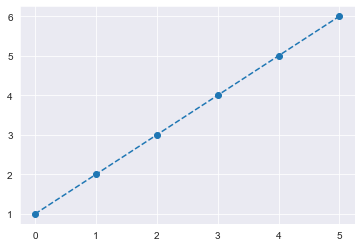

In [45]:
x=np.arange(6)
print(x)
print(type(x))
y=x+1
plt.plot(x,y,'o--')
plt.show()

[2 3 4 5]
[2 4]


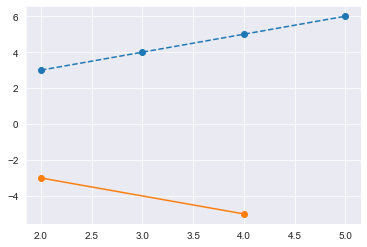

In [47]:
x=np.arange(2,6)
print(x)
y=x+1

a=np.arange(2,6,2)
print(a)
b=a+1

plt.plot(x,y,'o--')
plt.plot(a,-b,'o-')
plt.show()

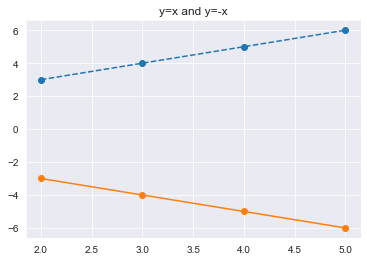

In [48]:
plt.plot(x,y,'o--')
plt.plot(x,-y,'o-')
plt.title('y=x and y=-x')
plt.show()

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


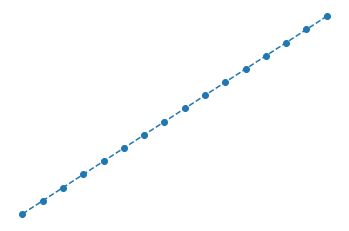

In [49]:
N=16
x=np.linspace(0,15,N)
print(x)

y=x
plt.plot(x,y,'o--')
plt.axis('off')
plt.show()

[  1.25892541   1.68525904   2.25597007   3.01995172   4.04265487
   5.41169527   7.2443596    9.69765359  12.98175275  17.37800829
  23.26305067  31.14105584  41.68693835  55.80417175  74.70218989
 100.        ]


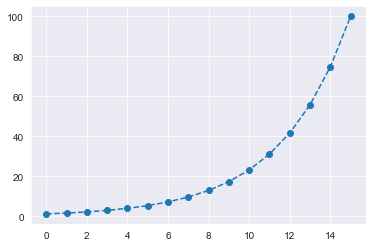

In [50]:
N=16
x=np.linspace(0,15,N)
y=np.logspace(0.1, 2, N)
print(y)
plt.plot(x,y,'o--')
plt.show()

[1.00000000e-01 1.93524223e-01 3.74516250e-01 7.24779664e-01
 1.40262421e+00 2.71441762e+00 5.25305561e+00 1.01659351e+01
 1.96735469e+01 3.80730788e+01 7.36806300e+01 1.42589867e+02
 2.75945932e+02 5.34022222e+02 1.03346236e+03 2.00000000e+03]


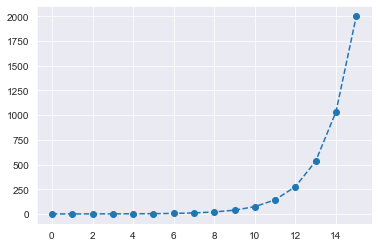

In [51]:
N=16
x=np.linspace(0,15,N)
y=np.geomspace(0.1, 2000, N)
print(y)
plt.plot(x,y,'o--')
plt.show()

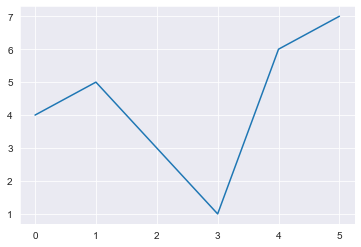

In [52]:
x=[4,5,3,1,6,7]
plt.plot(x)
plt.show()

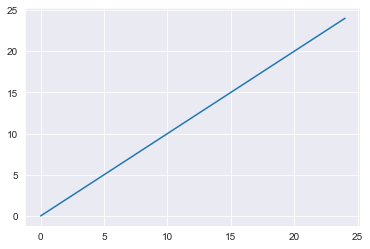

In [53]:
x=np.arange(25)
plt.plot(x)
plt.show()

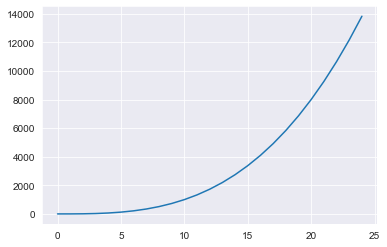

In [54]:
x=np.arange(25)
plt.plot(x,[(y**3+1) for y in x])
plt.show()

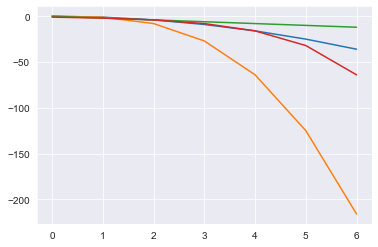

In [55]:
x=np.arange(7)
plt.plot(x,-x**2)
plt.plot(x,-x**3)
plt.plot(x,-2*x)
plt.plot(x,-2**x)
plt.show()

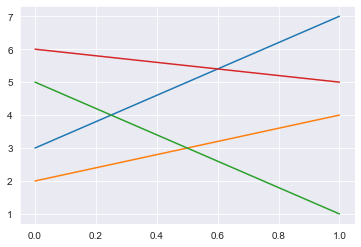

In [56]:
x=np.array([[3,2,5,6],[7,4,1,5]])
plt.plot(x)
plt.show()

[[ 0.41357601 -1.93459601  1.3648639  -0.1678312  -0.1968275   0.60699463
  -2.20935525 -0.58412128 -0.01615413 -0.8229052 ]
 [ 0.49290791 -1.51271499 -0.07768173  0.42342339 -0.90369627  0.01284792
  -0.12161113 -0.40594997 -1.60874105  1.17442438]]


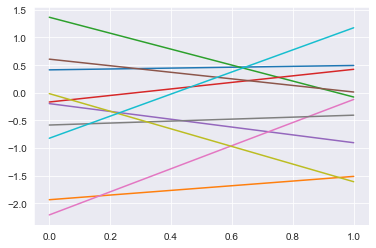

In [57]:
data=np.random.randn(2,10)
print(data)
plt.plot([data[0],data[1]])
plt.show()

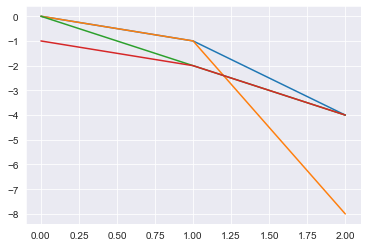

In [58]:
x=np.arange(3)
plt.plot(x,-x**2, x, -x**3, x, -2*x, x, -2**x)
plt.grid(True)
plt.savefig('test.png')
plt.show()

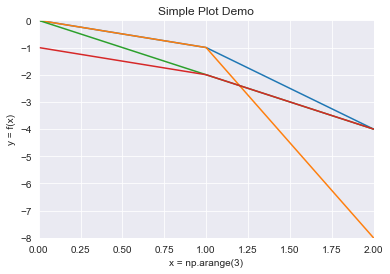

In [59]:
x=np.arange(3)
plt.plot(x,-x**2, x, -x**3, x, -2*x, x, -2**x)
plt.grid(True)
plt.xlabel('x = np.arange(3)')
plt.xlim([0,2])
plt.ylabel('y = f(x)')
plt.ylim([-8,0])
plt.title('Simple Plot Demo')
plt.show()

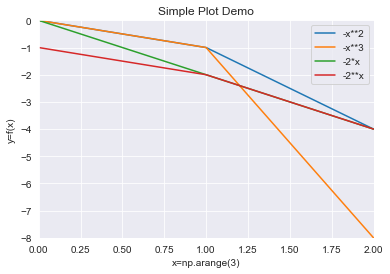

In [62]:
x=np.arange(3)
plt.plot(x,-x**2, label='-x**2')
plt.plot(x,-x**3, label='-x**3')
plt.plot(x,-2*x, label='-2*x')
plt.plot(x,-2**x, label='-2**x')
plt.legend()
plt.grid(True)
plt.xlabel('x=np.arange(3)')
plt.xlim([0,2])
plt.ylabel('y=f(x)')
plt.ylim([-8,0])
plt.title('Simple Plot Demo')
plt.show()